# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/MyDrive/Mnist_project')

In [5]:
os.getcwd()

'/content/drive/MyDrive/Mnist_project'

In [6]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`!

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [7]:
# Define transforms
# transform = transforms.Compose([
#     transforms.ToTensor(),
#     transforms.RandomRotation(30),
#     transforms.CenterCrop(10)
# ])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
transform1 = transforms.Compose([
    transforms.ToTensor()

])

# Create training, validation, and test sets
train_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_data = datasets.MNIST(root="./data", train=False, transform=transform)



# Split the dataset into training and validation sets (80% - 20% split)
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_data, val_data = torch.utils.data.random_split(train_data, [train_size, val_size])

# Define data loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 226987498.81it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 15532208.47it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 151021780.07it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 23753776.52it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**The chosen preprocessing steps, ToTensor() and Normalize(), are commonly applied to the MNIST dataset. ToTensor() converts the image data to PyTorch tensors, while Normalize() standardizes the pixel values by subtracting the mean and dividing by the standard deviation of the dataset. These steps ensure data compatibility and help improve model training by normalizing the input features.It is already preprocessed to some extent. The images are grayscale, centered, and of fixed size (28x28 pixels). Therefore, further preprocessing may not be necessary or may have minimal impact on the performance of the model.**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [8]:
# Print the shape and size of the train loader
train_batch = next(iter(train_loader))
train_data_shape = train_batch[0].shape
train_data_size = len(train_loader.dataset)
print("Train loader data shape:", train_data_shape)
print("Train loader data size:", train_data_size)

# Print the shape and size of the validation loader
val_batch = next(iter(val_loader))
val_data_shape = val_batch[0].shape
val_data_size = len(val_loader.dataset)
print("Validation loader data shape:", val_data_shape)
print("Validation loader data size:", val_data_size)

# Print the shape and size of the test loader
test_batch = next(iter(test_loader))
test_data_shape = test_batch[0].shape
test_data_size = len(test_loader.dataset)
print("Test loader data shape:", test_data_shape)
print("Test loader data size:", test_data_size)


Train loader data shape: torch.Size([64, 1, 28, 28])
Train loader data size: 48000
Validation loader data shape: torch.Size([64, 1, 28, 28])
Validation loader data size: 12000
Test loader data shape: torch.Size([64, 1, 28, 28])
Test loader data size: 10000


### A second DataLoader without any normalization or flattening

In [9]:
# Create training, validation, and test sets
transform = transforms.ToTensor()  # Transform to convert PIL images to tensors

train_data2 = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_data2 = datasets.MNIST(root="./data", train=False, transform=transform)

# Split the dataset into training and validation sets (80% - 20% split)
train_size2 = int(0.8 * len(train_data2))
val_size2 = len(train_data2) - train_size2
train_data2, val_data2 = torch.utils.data.random_split(train_data2, [train_size2, val_size2])

# Print the shape and size of the train loader
train_loader2 = DataLoader(train_data2, batch_size=64, shuffle=True)
train_batch2 = next(iter(train_loader2))
train_data_shape2 = train_batch2[0].shape
train_data_size2 = len(train_loader2.dataset)
print("Train loader data shape:", train_data_shape2)
print("Train loader data size:", train_data_size2)

# Print the shape and size of the validation loader
val_loader2 = DataLoader(val_data2, batch_size=64, shuffle=False)
val_batch2 = next(iter(val_loader2))
val_data_shape2 = val_batch2[0].shape
val_data_size2 = len(val_loader2.dataset)
print("Validation loader data shape:", val_data_shape2)
print("Validation loader data size:", val_data_size2)

# Print the shape and size of the test loader
test_loader2 = DataLoader(test_data2, batch_size=64, shuffle=False)
test_batch2 = next(iter(test_loader2))
test_data_shape2 = test_batch2[0].shape
test_data_size2 = len(test_loader2.dataset)
print("Test loader data shape:", test_data_shape2)
print("Test loader data size:", test_data_size2)


Train loader data shape: torch.Size([64, 1, 28, 28])
Train loader data size: 48000
Validation loader data shape: torch.Size([64, 1, 28, 28])
Validation loader data size: 12000
Test loader data shape: torch.Size([64, 1, 28, 28])
Test loader data size: 10000


In [10]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

9


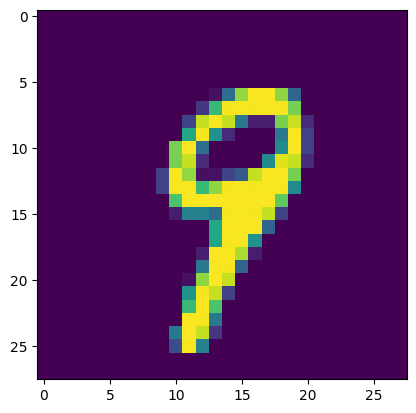

8


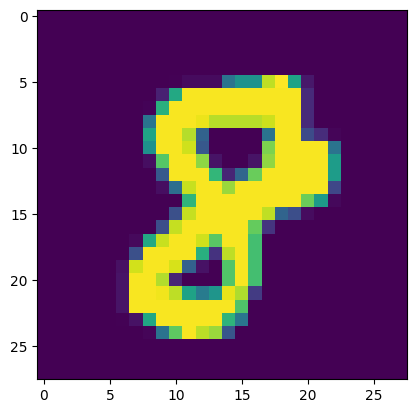

1


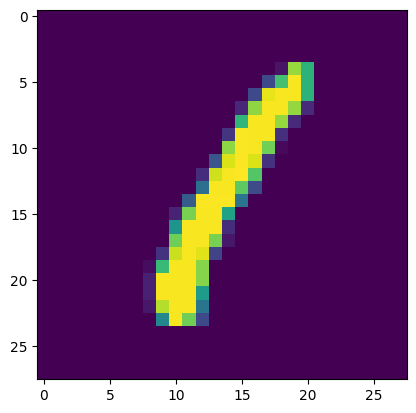

4


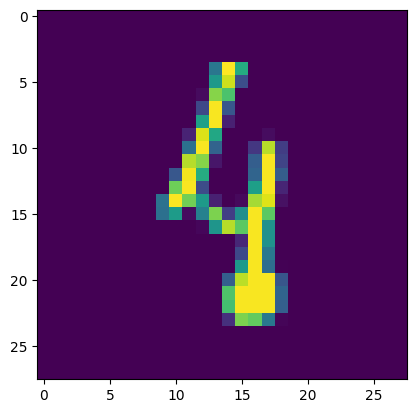

6


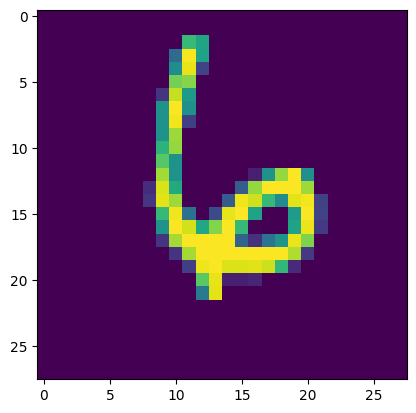

###########################################################################################################################
7


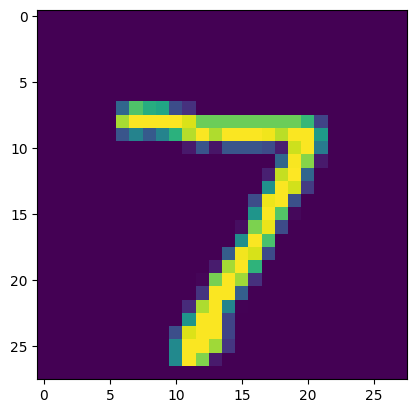

2


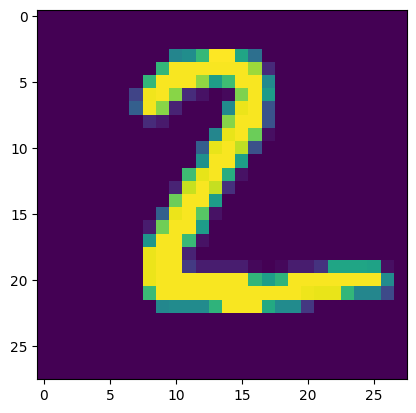

1


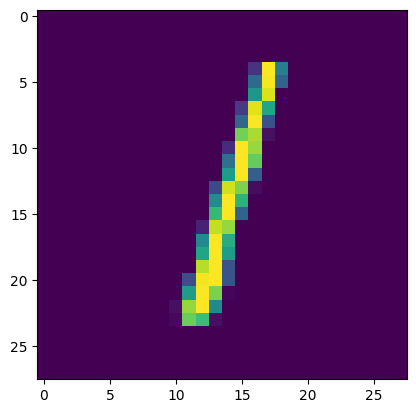

0


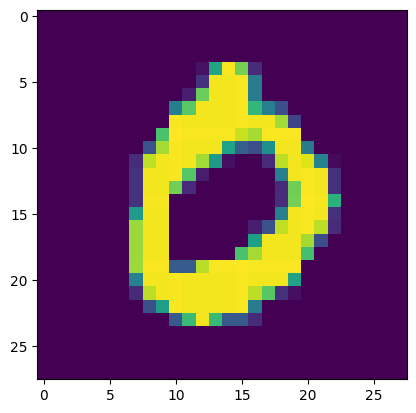

4


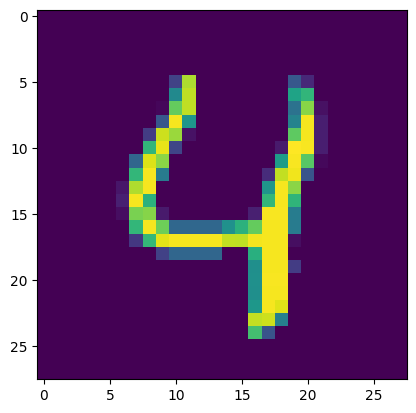

###########################################################################################################################
2


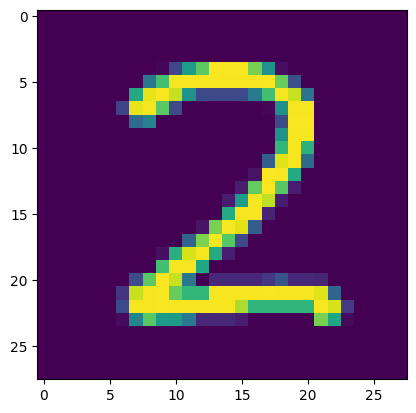

8


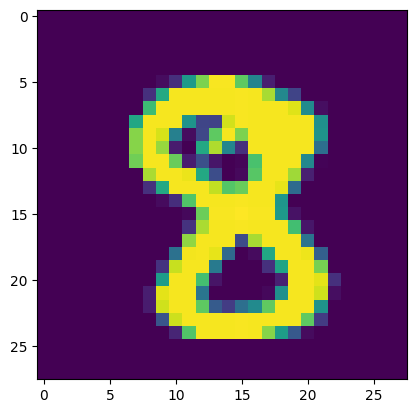

8


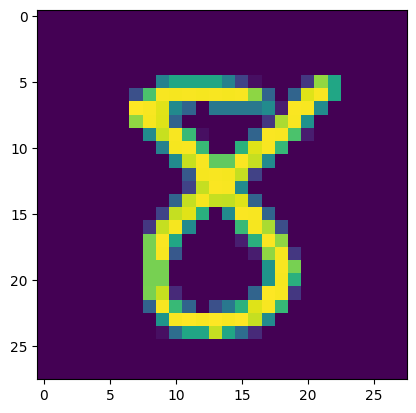

1


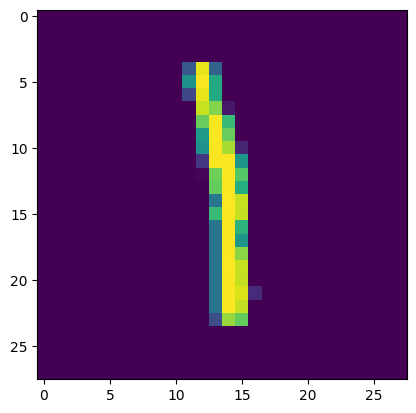

0


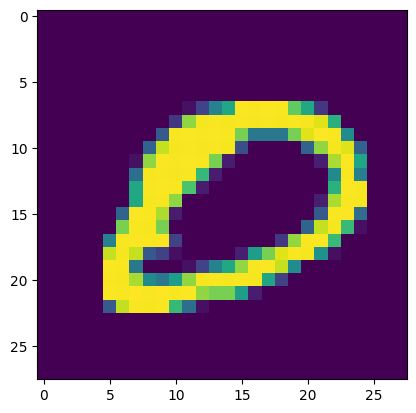

In [11]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)
print("#########################################"*3)
show5(test_loader)
print("#########################################"*3)
show5(val_loader)

9


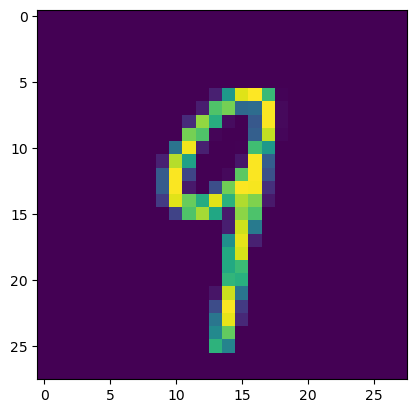

3


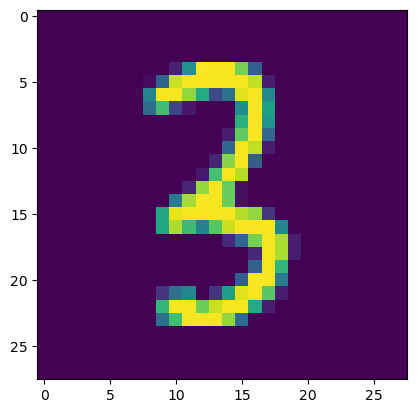

7


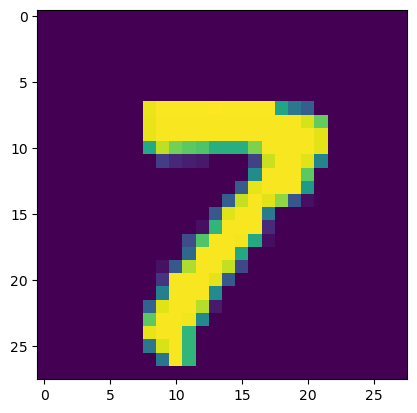

5


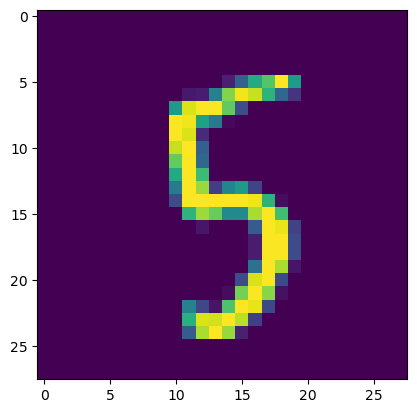

3


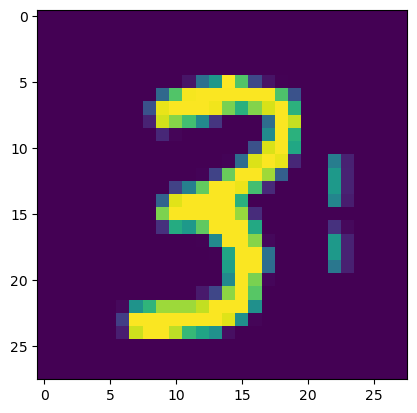

###########################################################################################################################
7


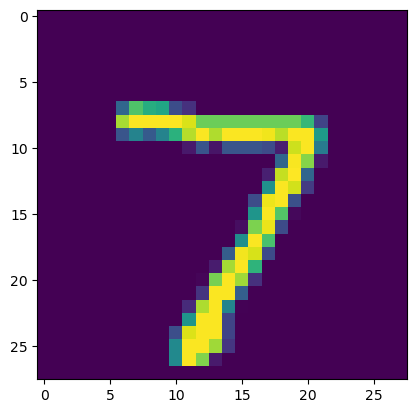

2


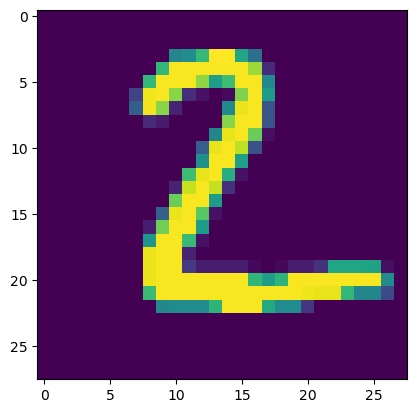

1


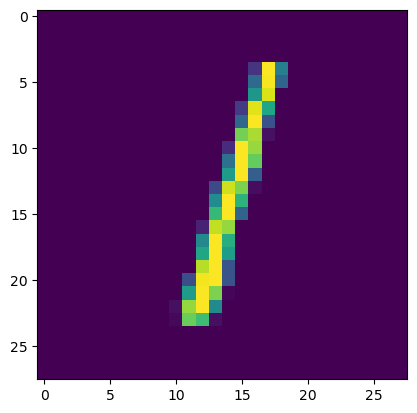

0


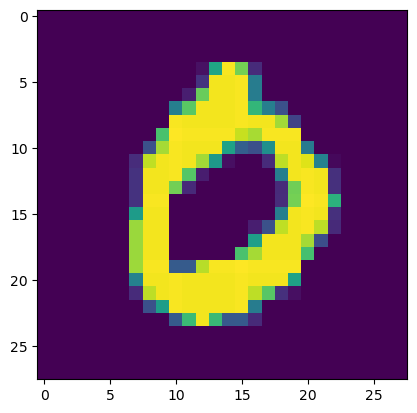

4


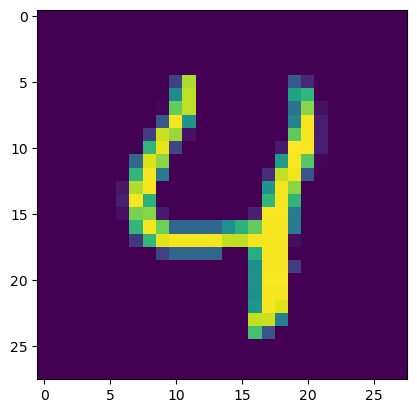

###########################################################################################################################
2


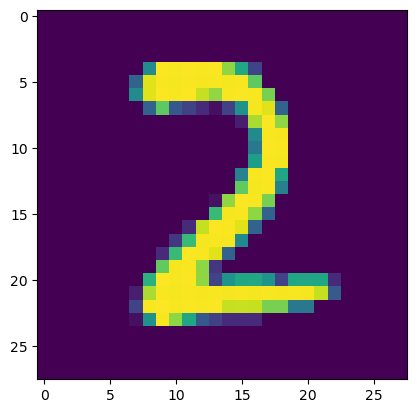

8


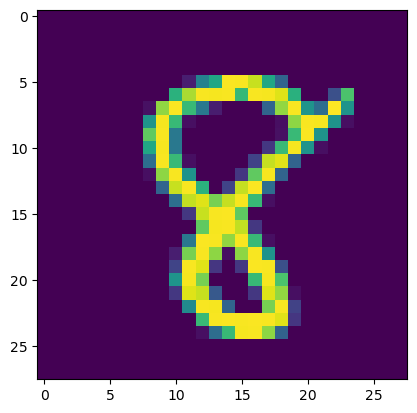

3


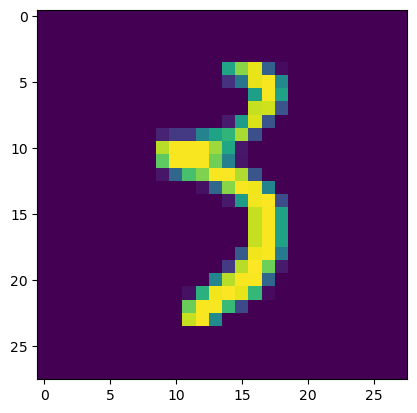

8


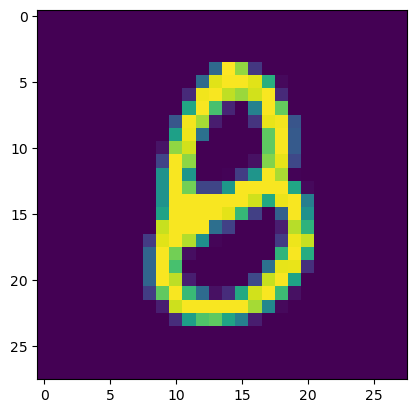

4


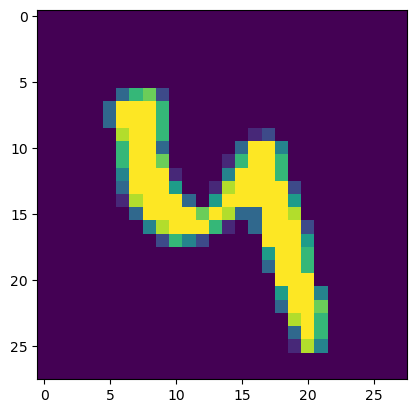

In [ ]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader2)
print("#########################################"*3)
show5(test_loader2)
print("#########################################"*3)
show5(val_loader2)

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like.

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [13]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 1024)
        self.bn1 = nn.BatchNorm1d(1024)
        self.dropout1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(1024, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout1(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x




Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [14]:
## YOUR CODE HERE ##
# Choose an optimizer
model = Net().to(device)

optimizer = optim.Adam(model.parameters(), lr=0.001)


# Choose a loss function
criterion = nn.CrossEntropyLoss()



## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch.
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [ ]:
# Training loop
num_epochs=30
# Establish a list for our history
train_loss_history = list()
val_loss_history = list()
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    epoch_train_loss = 0.0
    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(device)
        targets = targets.to(device)

        # Forward pass
        outputs = model(data)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

        # Print training loss
        if (batch_idx + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}")
            # train_loss_history.append(loss.item())

    # Compute average training loss for the epoch
    epoch_train_loss /= len(train_loader)
    train_loss_history.append(epoch_train_loss)

    # Evaluation loop
    model.eval()  # Set the model to evaluation mode
    epoch_val_loss = 0.0
    with torch.no_grad():
        correct = 0
        total = 0
        for data, targets in val_loader:
            data = data.to(device)
            targets = targets.to(device)

            # Forward pass
            outputs = model(data)
            loss = criterion(outputs, targets)
            epoch_val_loss += loss.item()



    epoch_val_loss /= len(val_loader)
    val_loss_history.append(epoch_val_loss)

Epoch [1/30], Step [100/750], Loss: 0.0203
Epoch [1/30], Step [200/750], Loss: 0.0260
Epoch [1/30], Step [300/750], Loss: 0.1072
Epoch [1/30], Step [400/750], Loss: 0.0399
Epoch [1/30], Step [500/750], Loss: 0.0143
Epoch [1/30], Step [600/750], Loss: 0.0097
Epoch [1/30], Step [700/750], Loss: 0.0016
Epoch [2/30], Step [100/750], Loss: 0.0093
Epoch [2/30], Step [200/750], Loss: 0.0061
Epoch [2/30], Step [300/750], Loss: 0.0699
Epoch [2/30], Step [400/750], Loss: 0.0070
Epoch [2/30], Step [500/750], Loss: 0.0067
Epoch [2/30], Step [600/750], Loss: 0.0342
Epoch [2/30], Step [700/750], Loss: 0.0890
Epoch [3/30], Step [100/750], Loss: 0.0498
Epoch [3/30], Step [200/750], Loss: 0.0551
Epoch [3/30], Step [300/750], Loss: 0.0110
Epoch [3/30], Step [400/750], Loss: 0.0725
Epoch [3/30], Step [500/750], Loss: 0.0053
Epoch [3/30], Step [600/750], Loss: 0.0043
Epoch [3/30], Step [700/750], Loss: 0.0795
Epoch [4/30], Step [100/750], Loss: 0.0192
Epoch [4/30], Step [200/750], Loss: 0.0094
Epoch [4/30

Plot the training loss (and validation loss/accuracy, if recorded).

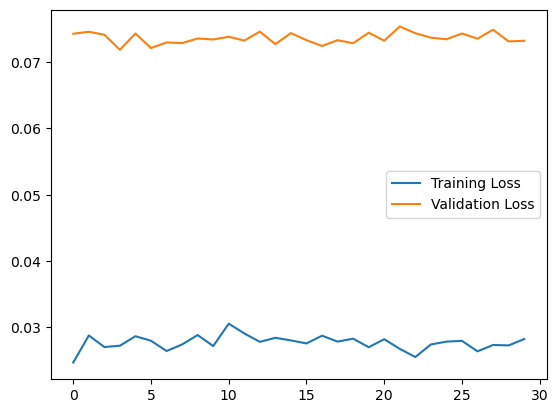

In [ ]:
## YOUR CODE HERE ##

plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction.

If your accuracy is over 90%, great work, but see if you can push a bit further!
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [ ]:
## YOUR CODE HERE ##
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for data, targets in test_loader:
        data = data.to(device)
        targets = targets.to(device)

        # Forward pass
        outputs = model(data)

        # Get predictions
        _, predicted = torch.max(outputs.data, 1)

        # Update total and correct predictions
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

    # Print accuracy
    print(f"Accuracy on the test set: {(100 * correct / total):.2f}%")

Accuracy on the test set: 98.55%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [ ]:
## YOUR CODE HERE ##


class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(64)
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.bn4 = nn.BatchNorm2d(256)
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(7 * 7 * 256, 512)
        self.relu5 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(512, 256)
        self.relu6 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.bn1(self.relu1(self.conv1(x)))
        x = self.bn2(self.relu2(self.conv2(x)))
        x = self.maxpool1(x)

        x = self.bn3(self.relu3(self.conv3(x)))
        x = self.bn4(self.relu4(self.conv4(x)))
        x = self.maxpool2(x)

        x = x.view(-1, 7 * 7 * 256)

        x = self.dropout1(self.relu5(self.fc1(x)))
        x = self.dropout2(self.relu6(self.fc2(x)))
        x = self.fc3(x)

        return x



In [ ]:
## YOUR CODE HERE ##
# Choose an optimizer
model_2 = CNNModel().to(device)

optimizer = optim.Adam(model_2.parameters(), lr=0.001)


# Choose a loss function
criterion = nn.CrossEntropyLoss()



In [ ]:
# Training loop
num_epochs=30
# Establish a list for our history
train_loss_history = list()
val_loss_history = list()
for epoch in range(num_epochs):
    model_2.train()  # Set the model to training mode
    epoch_train_loss = 0.0
    for batch_idx, (data, targets) in enumerate(train_loader):
        data = data.to(device)
        targets = targets.to(device)

        # Forward pass
        outputs = model_2(data)
        loss = criterion(outputs, targets)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

        # Print training loss
        if (batch_idx + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}")
            # train_loss_history.append(loss.item())

    # Compute average training loss for the epoch
    epoch_train_loss /= len(train_loader)
    train_loss_history.append(epoch_train_loss)

    # Evaluation loop

    model_2.eval()  # Set the model to evaluation mode
    epoch_val_loss = 0.0
    with torch.no_grad():
        correct = 0
        total = 0
        for data, targets in val_loader:
            data = data.to(device)
            targets = targets.to(device)

            # Forward pass
            outputs = model_2(data)
            loss = criterion(outputs, targets)
            epoch_val_loss += loss.item()



        epoch_val_loss /= len(test_loader)
        val_loss_history.append(epoch_val_loss)

Epoch [1/30], Step [100/750], Loss: 0.2876
Epoch [1/30], Step [200/750], Loss: 0.1534
Epoch [1/30], Step [300/750], Loss: 0.1509
Epoch [1/30], Step [400/750], Loss: 0.2235
Epoch [1/30], Step [500/750], Loss: 0.1631
Epoch [1/30], Step [600/750], Loss: 0.1420
Epoch [1/30], Step [700/750], Loss: 0.0111
Epoch [2/30], Step [100/750], Loss: 0.0499
Epoch [2/30], Step [200/750], Loss: 0.1761
Epoch [2/30], Step [300/750], Loss: 0.0817
Epoch [2/30], Step [400/750], Loss: 0.1534
Epoch [2/30], Step [500/750], Loss: 0.1334
Epoch [2/30], Step [600/750], Loss: 0.1823
Epoch [2/30], Step [700/750], Loss: 0.1187
Epoch [3/30], Step [100/750], Loss: 0.0861
Epoch [3/30], Step [200/750], Loss: 0.2075
Epoch [3/30], Step [300/750], Loss: 0.0526
Epoch [3/30], Step [400/750], Loss: 0.0321
Epoch [3/30], Step [500/750], Loss: 0.0002
Epoch [3/30], Step [600/750], Loss: 0.0184
Epoch [3/30], Step [700/750], Loss: 0.0333
Epoch [4/30], Step [100/750], Loss: 0.0678
Epoch [4/30], Step [200/750], Loss: 0.0301
Epoch [4/30

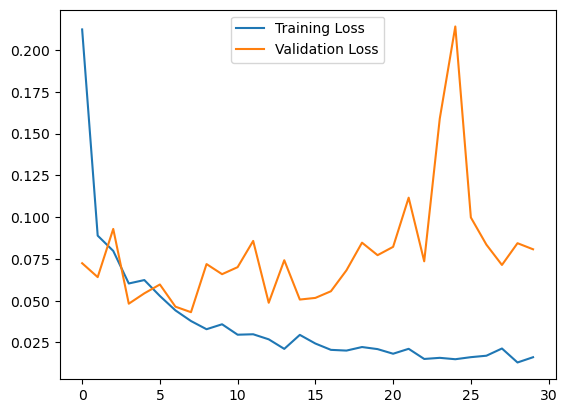

In [ ]:
# Plot the training and validation loss history
plt.plot(train_loss_history, label="Training Loss")
plt.plot(val_loss_history, label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
## YOUR CODE HERE ##
model_2.eval()  # Set the model to evaluation mode
with torch.no_grad():
    correct = 0
    total = 0
    for data, targets in test_loader:
        data = data.to(device)
        targets = targets.to(device)

        # Forward pass
        outputs = model_2(data)

        # Get predictions
        _, predicted = torch.max(outputs.data, 1)

        # Update total and correct predictions
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

    # Print accuracy
    print(f"Accuracy on the test set: {(100 * correct / total):.2f}%")

Accuracy on the test set: 99.20%


## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
## YOUR CODE HERE ##
# Save the model's state dictionary and other information
torch.save({
    'epoch': num_epochs,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_loss_history': train_loss_history,
    'val_loss_history': val_loss_history
}, 'saved_model.pth')